#### Imports

In [11]:
import os

import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression

from data_io import get_data
from utils import display_result

### Predictions Files

In [12]:
predictions_files = []

predictions_root = 'predictions'
for path, _, files in os.walk(predictions_root):
    for name in files:
        predictions_files.append(os.path.join(path, name))

filter_fn_test_mitbih = lambda name: 'mitbih' in name and 'test' in name and 'proba' in name and 'vae' not in name and 'basic_rnn' not in name
filter_fn_train_mitbih = lambda name: 'mitbih' in name and 'train' in name and 'proba' in name and 'vae' not in name and 'basic_rnn' not in name

filter_fn_test_ptb = lambda name: 'ptb' in name and 'test' in name and 'proba' in name and 'vae' not in name and 'basic_rnn' not in name and 'attention_cnn' not in name
filter_fn_train_ptb = lambda name: 'ptb' in name and 'train' in name and 'proba' in name and 'vae' not in name and 'basic_rnn' not in name

predictions_files_test_mitbih = list(filter(filter_fn_test_mitbih, predictions_files))
predictions_files_train_mitbih = list(filter(filter_fn_train_mitbih, predictions_files))

predictions_files_test_ptb = list(filter(filter_fn_test_ptb, predictions_files))
predictions_files_train_ptb = list(filter(filter_fn_train_ptb, predictions_files))

### Model Predictions

In [13]:
n_test_mit = np.load(predictions_files_test_mitbih[0]).shape[0]
combined_predictions_test_mit = np.zeros(shape=(n_test_mit, 5, len(predictions_files_test_mitbih)))
for ii, predictions_path in enumerate(predictions_files_test_mitbih):
    combined_predictions_test_mit[:, :, ii] = np.load(predictions_path)

n_train_mit = np.load(predictions_files_train_mitbih[0]).shape[0]
combined_predictions_train_mit = np.zeros(shape=(n_train_mit, 5, len(predictions_files_train_mitbih)))
for ii, predictions_path in enumerate(predictions_files_train_mitbih):
    combined_predictions_train_mit[:, :, ii] = np.load(predictions_path)

In [14]:
n_test_ptb = np.load(predictions_files_test_ptb[0]).shape[0]
combined_predictions_test_ptb = np.zeros(shape=(n_test_ptb, 5, len(predictions_files_test_ptb)))
for ii, predictions_path in enumerate(predictions_files_test_ptb):
    print(predictions_path)
    print(np.load(predictions_path).shape)
    combined_predictions_test_ptb[:, :, ii] = np.load(predictions_path)

n_train_ptb = np.load(predictions_files_train_ptb[0]).shape[0]
combined_predictions_train_ptb = np.zeros(shape=(n_train_ptb, 5, len(predictions_files_train_ptb)))
for ii, predictions_path in enumerate(predictions_files_train_ptb):
    combined_predictions_train_ptb[:, :, ii] = np.load(predictions_path)

### True Test Labels

In [15]:
_, y_train_mit, _, y_test_mit = get_data(dataset='mitbih')

In [16]:
_, y_train_ptb, _, y_test_ptb = get_data(dataset='ptbdb')

# Average

In [17]:
averaged_prediction_probabilities_mit = np.mean(combined_predictions_test_mit, axis=2)
averaged_predictions_mit = np.argmax(averaged_prediction_probabilities_mit, axis=1)

In [10]:
averaged_prediction_probabilities_ptb = np.mean(combined_predictions_test_ptb, axis=2)
averaged_predictions_ptb = np.argmax(averaged_prediction_probabilities_ptb, axis=1)

### Results

f1 score micro:           0.98506
f1 score macro:           0.91685
f1 score weighted:        0.98433
accuracy score:           0.98506
balanced accuracy score:  0.87123


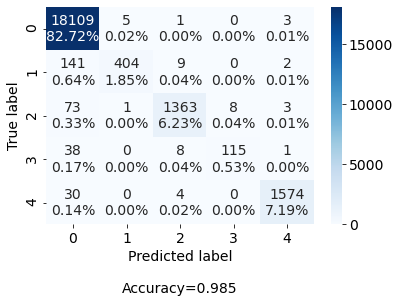

In [18]:
display_result(y_test_mit, averaged_predictions_mit)

In [19]:
display_result(y_test_mit, averaged_predictions_ptb, True, averaged_prediction_probabilities_ptb[:, 1])

# Logistic Regression

In [20]:
X_train_mit = np.reshape(combined_predictions_train_mit, newshape=(n_train_mit, -1))
X_test_mit = np.reshape(combined_predictions_test_mit, newshape=(n_test_mit, -1))

In [31]:
X_train_ptb = np.reshape(combined_predictions_train_ptb, newshape=(n_train_ptb, -1))
X_test_ptb = np.reshape(combined_predictions_test_ptb, newshape=(n_test_ptb, -1))

In [ ]:
lr_mit = LogisticRegression(C=1.0, class_weight='balanced', n_jobs=-1)

In [32]:
lr_ptb = LogisticRegression(C=1.0, class_weight='balanced', n_jobs=-1)

In [22]:
lr_mit.fit(X_train_mit, y_train_mit)

LogisticRegression(class_weight='balanced', n_jobs=-1)

In [25]:
lr_ptb.fit(X_train_ptb, y_train_ptb)

In [23]:
test_preds_mit = lr_mit.predict(X_test_mit)

In [ ]:
test_preds_ptb = lr_ptb.predict(X_test_ptb)

f1 score micro:           0.98397
f1 score macro:           0.89265
f1 score weighted:        0.98532
accuracy score:           0.98397
balanced accuracy score:  0.94998


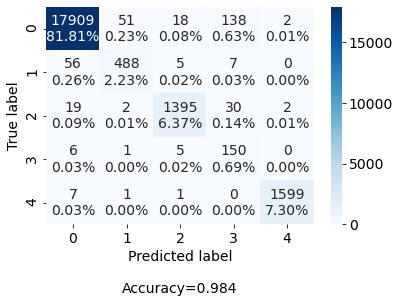

In [24]:
display_result(y_test_mit, test_preds_mit)

In [26]:
display_result(y_test_ptb, test_preds_ptb)